In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [198]:
data=pd.read_csv("breastCancer.csv")
data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [199]:
#Renaming the column with the required name
data.rename(columns={'class':'Diagnosis'},inplace=True)

In [200]:
data.head()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,Diagnosis
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [201]:
#Printing all the colmn names
data.columns

Index(['id', 'clump_thickness', 'size_uniformity', 'shape_uniformity',
       'marginal_adhesion', 'epithelial_size', 'bare_nucleoli',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'Diagnosis'],
      dtype='object')

In [202]:
#Information of the Dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 699 non-null    int64 
 1   clump_thickness    699 non-null    int64 
 2   size_uniformity    699 non-null    int64 
 3   shape_uniformity   699 non-null    int64 
 4   marginal_adhesion  699 non-null    int64 
 5   epithelial_size    699 non-null    int64 
 6   bare_nucleoli      699 non-null    object
 7   bland_chromatin    699 non-null    int64 
 8   normal_nucleoli    699 non-null    int64 
 9   mitoses            699 non-null    int64 
 10  Diagnosis          699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [203]:
#Checking for the duplicate values in the Dataframe
data.drop_duplicates(inplace=True)
print("Number of duplicate rows after cleaning:", data.duplicated().sum())

Number of duplicate rows after cleaning: 0


In [204]:
data.describe()

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bland_chromatin,normal_nucleoli,mitoses,Diagnosis
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.435601,2.882779,1.593343,2.688857
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,2.442345,3.066298,1.723129,0.951051
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [205]:
#data.dropna(subset=['bare_nucleoli'],inplace=True)

In [206]:
#Checking missing values in the Dataset
missing_value=data.isnull().sum()
missing_value

id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        0
bland_chromatin      0
normal_nucleoli      0
mitoses              0
Diagnosis            0
dtype: int64

In [207]:
#Handling missing values(replace '?' with NaN)
data.replace('?',np.nan,inplace=True)

In [208]:
#Number of rows and columns in the DataFrame
num_rows,num_columns=data.shape
print(f"Number of rows:{num_rows}")
print(f"Number of columns:{num_columns}")

Number of rows:691
Number of columns:11


In [209]:
#Convert columns to numeric(if posssible)
numeric_columns=data.columns
data[numeric_columns]=data[numeric_columns].apply(pd.to_numeric,errors='coerce')

In [210]:
#To convert 2 and 4 to binary code 0 and 1 for M and B
new_label=LabelEncoder()
data['Diagnosis']=new_label.fit_transform(data['Diagnosis'])
data

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses,Diagnosis
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [211]:
#To check the importance of the features
correlation=data.corr()
target=correlation['Diagnosis'].abs()
features=target.sort_values(ascending=False).index
features

Index(['Diagnosis', 'bare_nucleoli', 'size_uniformity', 'shape_uniformity',
       'bland_chromatin', 'clump_thickness', 'normal_nucleoli',
       'marginal_adhesion', 'epithelial_size', 'mitoses', 'id'],
      dtype='object')

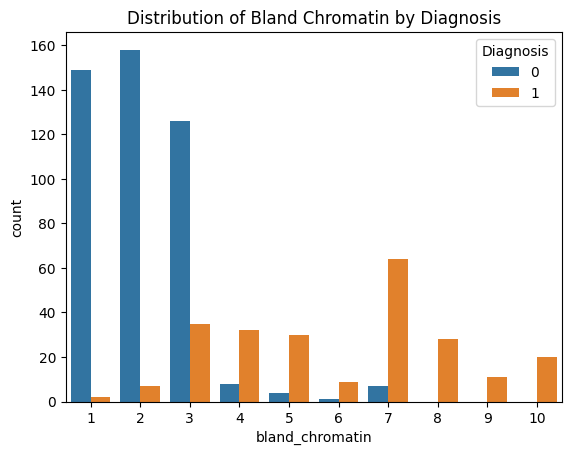

In [212]:
#To visualise the distribution of Bland Chromatin by Diagnosis
sns.countplot(data=data,x='bland_chromatin',hue='Diagnosis')
plt.title('Distribution of Bland Chromatin by Diagnosis')
plt.show()

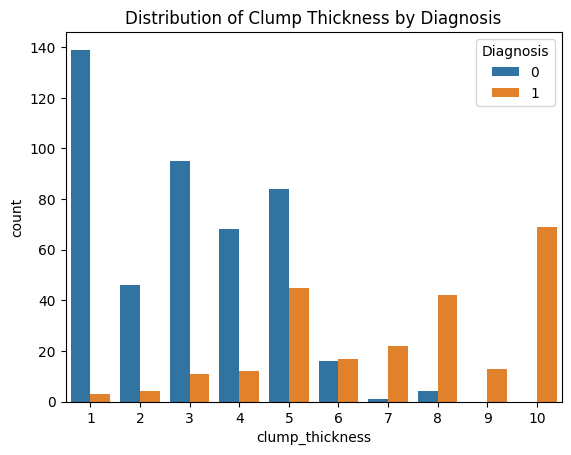

In [213]:
#To visualize the distribution of Clump Thickness by Diagnosis
sns.countplot(data=data,x='clump_thickness',hue='Diagnosis')
plt.title("Distribution of Clump Thickness by Diagnosis")
plt.show()

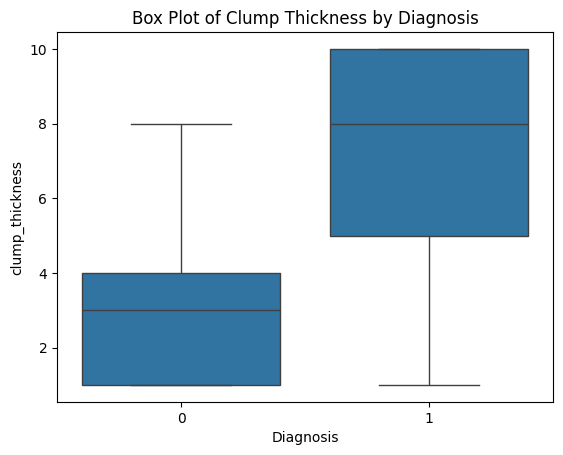

In [214]:
#To visualize the spread of Clump Thickness values for each diagnosis
sns.boxplot(data=data,x='Diagnosis',y='clump_thickness')
plt.title('Box Plot of Clump Thickness by Diagnosis')
plt.show()

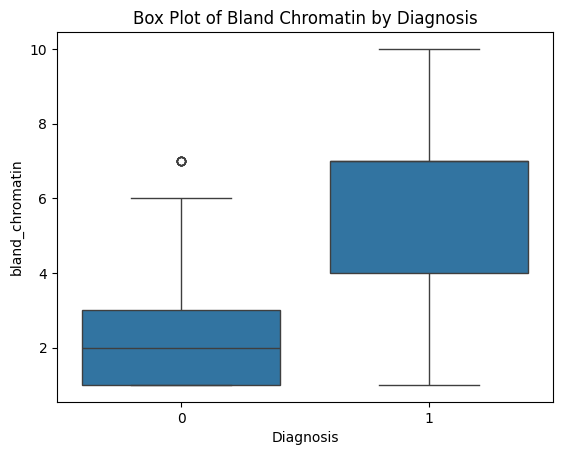

In [215]:
#To visualize the spread of Bland Chromatin for each diagnosis
sns.boxplot(data=data,x='Diagnosis',y='bland_chromatin')
plt.title('Box Plot of Bland Chromatin by Diagnosis')
plt.show()

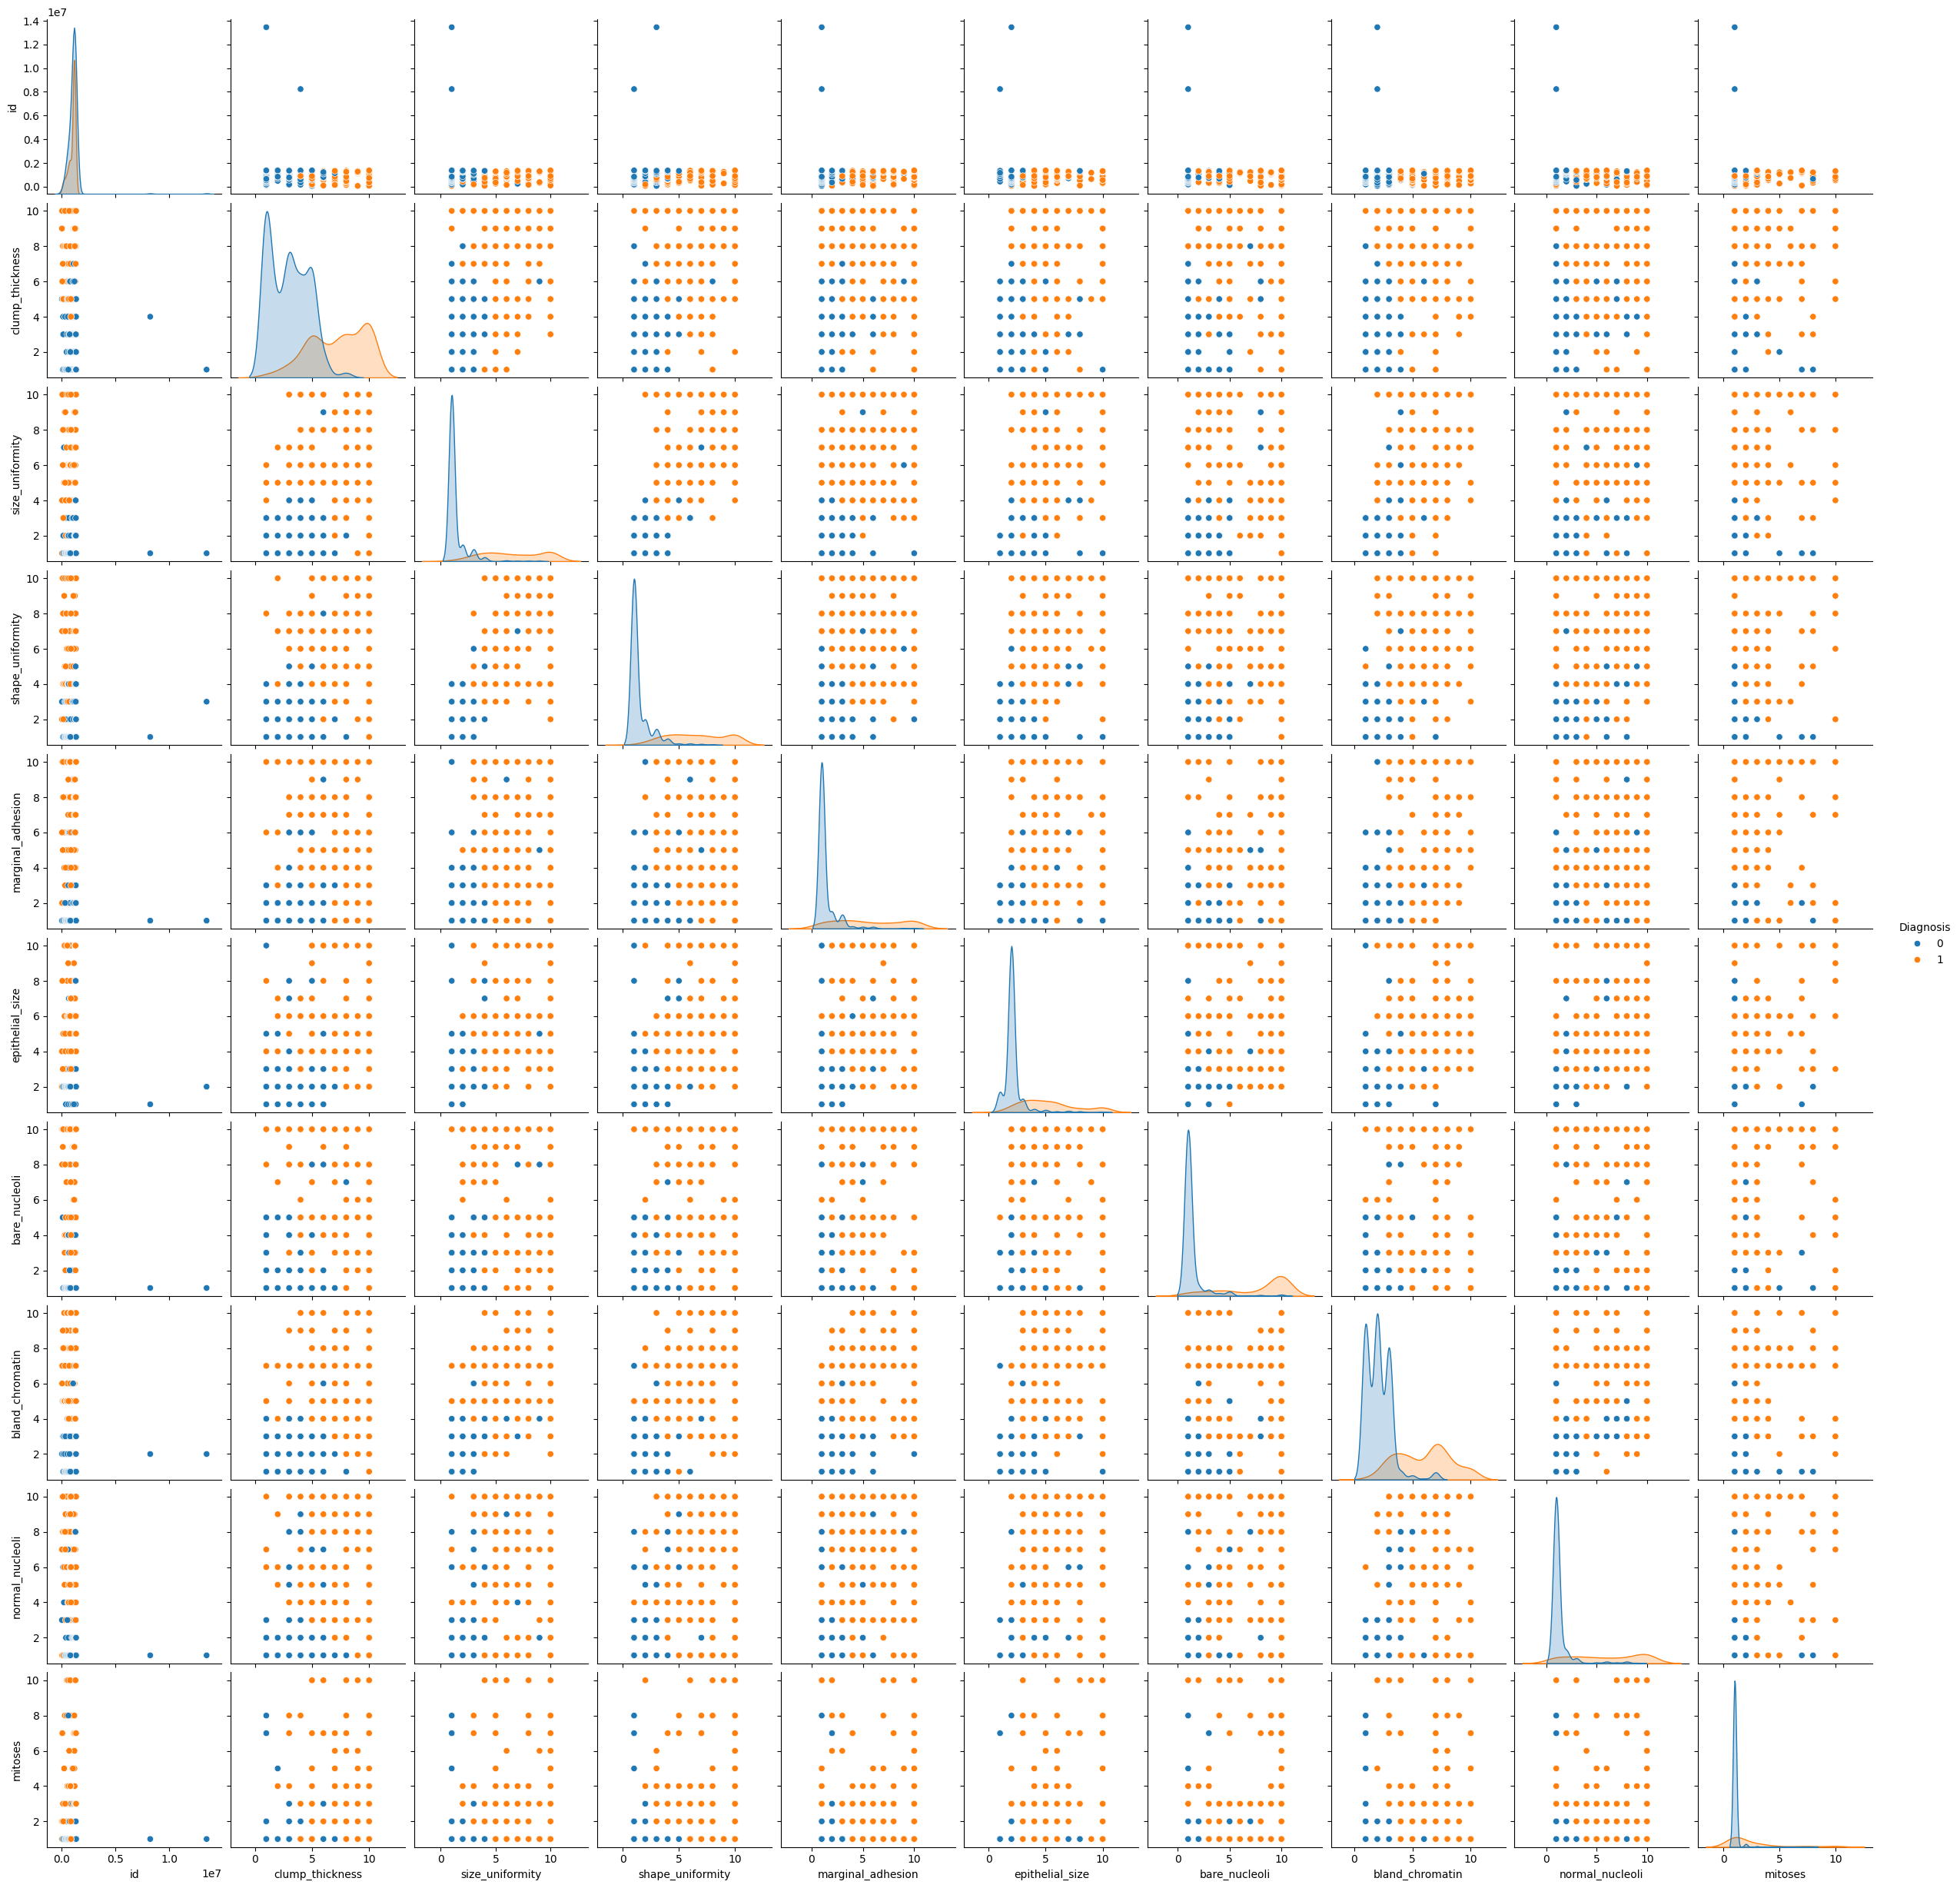

In [216]:
#To suppress the specific warning about figure layout change
warnings.filterwarnings("ignore",message="The figure layout has changed to tight")

#To visualize the combination of diagnosis
sns.pairplot(data,hue='Diagnosis')

In [217]:
#To split the data into training and testing sets
X=data.drop(columns=['Diagnosis'])
Y=data['Diagnosis']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
X_train

,id,clump_thickness,size_uniformity,shape_uniformity,marginal_adhesion,epithelial_size,bare_nucleoli,bland_chromatin,normal_nucleoli,mitoses
613,1016634,2,3,1,1,2,1.0,2,1,1
179,1202812,5,3,3,3,6,10.0,3,1,1
350,836433,5,1,1,3,2,1.0,1,1,1
543,1184586,4,1,1,1,2,1.0,2,1,1
30,1070935,3,1,1,1,1,1.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...
107,1170420,1,6,8,10,8,10.0,5,7,1
651,1323477,1,2,1,3,2,1.0,2,1,1
122,1174131,10,10,10,2,10,10.0,5,3,3
357,859350,8,10,10,7,10,10.0,7,3,8


In [218]:
#To check the missing values in the training dataset
missing_train_values=X_train.isnull().sum()
print("MIssing values in training set:")
print(missing_train_values)

#To check the missing values in the testing dataset
missing_test_values=X_test.isnull().sum()
print("\nMissing values in testing set:")
print(missing_test_values)

MIssing values in training set:
id                    0
clump_thickness       0
size_uniformity       0
shape_uniformity      0
marginal_adhesion     0
epithelial_size       0
bare_nucleoli        14
bland_chromatin       0
normal_nucleoli       0
mitoses               0
dtype: int64

Missing values in testing set:
id                   0
clump_thickness      0
size_uniformity      0
shape_uniformity     0
marginal_adhesion    0
epithelial_size      0
bare_nucleoli        2
bland_chromatin      0
normal_nucleoli      0
mitoses              0
dtype: int64


In [223]:
#To check the bare_nucleoli column for non_numeric values
non_numeric_bare_nucleoli=data[pd.to_numeric(data['bare_nucleoli'],errors='coerce').isna()]
print(non_numeric_bare_nucleoli)

          id  clump_thickness  size_uniformity  shape_uniformity  \
23   1057013                8                4                 5   
40   1096800                6                6                 6   
139  1183246                1                1                 1   
145  1184840                1                1                 3   
158  1193683                1                1                 2   
164  1197510                5                1                 1   
235  1241232                3                1                 4   
249   169356                3                1                 1   
275   432809                3                1                 3   
292   563649                8                8                 8   
294   606140                1                1                 1   
297    61634                5                4                 3   
315   704168                4                6                 5   
321   733639                3                1  

In [229]:
#To change the datatype and then convert the string value to a numeric character by replacing it with the median value of that column
data['bare_nucleoli']=data['bare_nucleoli'].astype(str)

#To calculate the median for numeric values
median_value=pd.to_numeric(data['bare_nucleoli'],errors='coerce').median()

#Replace non_numeric values with the median
data['bare_nucleoli']=pd.to_numeric(data['bare_nucleoli'],errors='coerce').fillna(median_value).astype(int)